In [1]:
raw_folder_path = "/Users/sefika/phd_projects/revision/RAG4RE/results/FlanT5/raw/XXL"
resulting_response_folder_path = "/Users/sefika/phd_projects/revision/RAG4RE/results/FlanT5/returned_responses/XXL/"

In [3]:
# read and write json
import os
import sys
import json

def read_json(path):
    with open(path, 'r', encoding="utf-8") as f:
        data = json.load(f)
    return data

def write_json(data, path):
    with open(path, 'w', encoding="utf-8") as f:
        json.dump(data, f, indent=4, ensure_ascii=False)

In [4]:
raw_files = []

for file_name in os.listdir(raw_folder_path):
    if not "semeval" in file_name:
        raw_files.append(file_name)



In [7]:
resulting_response_files = []

for file_name in os.listdir(resulting_response_folder_path):
    if not "semeval" in file_name:
        resulting_response_files.append(file_name)

In [9]:
len(raw_files)
raw_folder_path

'/Users/sefika/phd_projects/revision/RAG4RE/results/FlanT5/raw/XXL'

In [11]:
## Wrong prefix Examples!
stats_per_files = []
for i in range(0, 6):
    # print(i)
    
    raw_data = read_json(raw_folder_path+"/"+raw_files[i])
    resulting_data = read_json(resulting_response_folder_path+'/'+resulting_response_files[i])
    count = 0
    for j in range(len(raw_data)):
        r_item = raw_data[j]
        resulting_item = resulting_data[j]
        if ":" in r_item and ":" in resulting_item :
            r_prefix, r_relation = r_item.split(":")[0], r_item.split(":")[1]
            
            resulting_prefix, resulting_relation = resulting_item.split(":")[0], resulting_item.split(":")[1]
            if r_relation==resulting_relation and r_prefix!=resulting_prefix:
                print(f"file_name: {raw_files[i]} \tRaw Result: {r_item}-------> Resulting Relation:{resulting_item}")
                count +=1
    count_info = {'file': raw_files[i], "count":count}
    stats_per_files.append(count_info)
       

file_name: XXL_tacred_rag_prompts_results.json 	Raw Result: per:number_of_employees/members-------> Resulting Relation:org:number_of_employees/members
file_name: XXL_tacred_rag_prompts_results.json 	Raw Result: per:parents-------> Resulting Relation:org:parents
file_name: XXL_tacred_rag_prompts_results.json 	Raw Result: per:city_of_headquarters-------> Resulting Relation:org:city_of_headquarters
file_name: XXL_tacred_rag_prompts_results.json 	Raw Result: per:parents-------> Resulting Relation:org:parents
file_name: XXL_tacred_rag_prompts_results.json 	Raw Result: per:stateorprovince_of_headquarters-------> Resulting Relation:org:stateorprovince_of_headquarters
file_name: XXL_tacred_rag_prompts_results.json 	Raw Result: per:number_of_employees/members-------> Resulting Relation:org:number_of_employees/members
file_name: XXL_tacred_rag_prompts_results.json 	Raw Result: per:number_of_employees/members-------> Resulting Relation:org:number_of_employees/members
file_name: XXL_tacred_rag_pro

In [13]:
stats_per_files

[{'file': 'XXL_tacred_rag_prompts_results.json', 'count': 54},
 {'file': 'XXL_tacred_query_prompts_results.json', 'count': 75},
 {'file': 'XXL_retacred_rag_prompts_results.json', 'count': 36},
 {'file': 'XXL_retacred_query_prompts_results.json', 'count': 30},
 {'file': 'XXL_tacrev_query_prompts_results.json', 'count': 60},
 {'file': 'XXL_tacrev_rag_prompts_results.json', 'count': 2}]

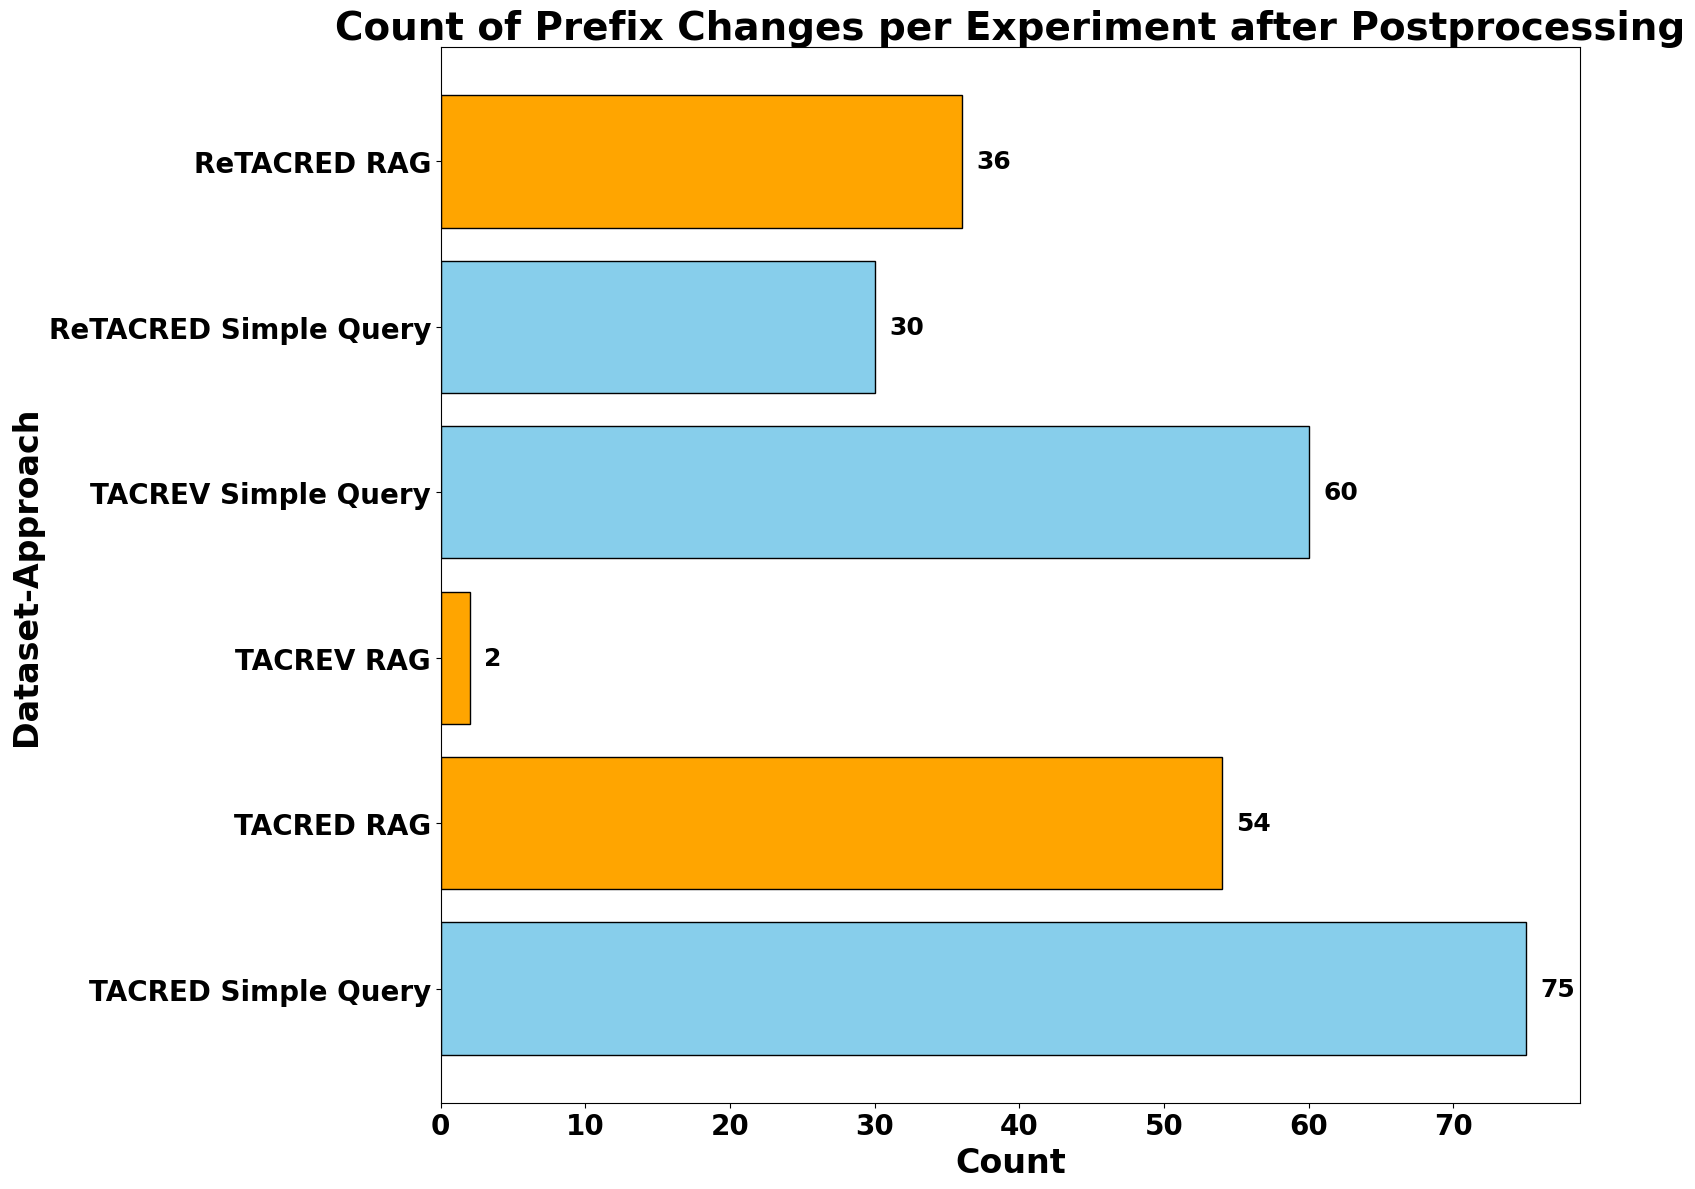

In [1]:
import matplotlib.pyplot as plt

# Data
stats_per_files = [
    {'file': 'TACRED Simple Query.json', 'count': 75},
    {'file': 'TACRED RAG.json', 'count': 54},
    {'file': 'TACREV RAG.json', 'count': 2},
    {'file': 'TACREV Simple Query.json', 'count': 60},
    {'file': 'ReTACRED Simple Query.json', 'count': 30},
    {'file': 'ReTACRED RAG.json', 'count': 36}
]

# Aggregating data
aggregated_data = {}
for entry in stats_per_files:
    file_name = entry['file'].split(".")[0]
    aggregated_data[file_name] = aggregated_data.get(file_name, 0) + entry['count']

# Preparing data for the bar chart
files = list(aggregated_data.keys())
counts = list(aggregated_data.values())

# Define colors based on "rag" and "query" presence in file names
colors = ['orange' if 'RAG' in file else 'skyblue' if 'Query' in file else 'green' for file in files]

# Plotting the bar chart
plt.figure(figsize=(16, 12))
bars = plt.barh(files, counts, color=colors, edgecolor='black')

# Adding counts on top of each bar
for bar, count in zip(bars, counts):
    plt.text(count + 1, bar.get_y() + bar.get_height() / 2, str(count), va='center', fontsize=18, fontweight='bold')

# Customizing labels and title
plt.xlabel('Count', fontsize=24, fontweight='bold')
plt.ylabel('Dataset-Approach', fontsize=24, fontweight='bold')
plt.title('Count of Prefix Changes per Experiment after Postprocessing', fontsize=28, fontweight='bold')

# Adjusting tick label sizes and making them bold
plt.xticks(fontsize=20, fontweight='bold')
plt.yticks(fontsize=20, fontweight='bold')

# Adjust layout and save
plt.tight_layout()
plt.savefig('prefix_changes_bar_chart_XXL.pdf', dpi=1000, bbox_inches='tight')

# Display the plot
plt.show()
